# Pre-Processing of Data from the Wind Tunnel

Data was collected on 29.10.25 with the force, and encoder counts from our sensor and the ground truth 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cell 2: Load the CSV data from file
# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('data/ground_truth_calibration/plot_take2_1.csv')
print("Data loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Data loaded successfully!
Shape: (33161, 13)


,timestamp_iso,timestamp_epoch,t_rel_s,device_name,port,value_raw_mps,value_clipped_mps,expected_error_pct,cov_lower_mps,cov_upper_mps,raw_serial_line,csv_col_0,csv_col_1
0,2025-10-29T17:18:07.615Z,14941.873987,7.706572,Ground Truth,/dev/ttyACM0,-0.49,0.0,NaN,NaN,NaN,-0.49,-0.4900,NaN
1,2025-10-29T17:18:07.615Z,14941.876795,7.709380,Student,/dev/ttyACM1,0.00,0.0,NaN,NaN,NaN,"-0.5325, 0",-0.5325,0.0
2,2025-10-29T17:18:07.615Z,14941.878964,7.711548,Ground Truth,/dev/ttyACM0,-0.49,0.0,NaN,NaN,NaN,-0.49,-0.4900,NaN
3,2025-10-29T17:18:07.621Z,14941.882930,7.715514,Student,/dev/ttyACM1,0.00,0.0,NaN,NaN,NaN,"-0.5364, 0",-0.5364,0.0
4,2025-10-29T17:18:07.622Z,14941.883854,7.716438,Ground Truth,/dev/ttyACM0,-0.49,0.0,NaN,NaN,NaN,-0.49,-0.4900,NaN


In [3]:
# Cell 3: Display data info and check for missing values
print("Dataset Information:")
print(df.info())
print("\n" + "="*60)
print("\nMissing values:")
print(df.isnull().sum())
print("\n" + "="*60)
print("\nColumn names:")
print(df.columns.tolist())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33161 entries, 0 to 33160
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp_iso       33161 non-null  object 
 1   timestamp_epoch     33161 non-null  float64
 2   t_rel_s             33161 non-null  float64
 3   device_name         33161 non-null  object 
 4   port                33161 non-null  object 
 5   value_raw_mps       33161 non-null  float64
 6   value_clipped_mps   33161 non-null  float64
 7   expected_error_pct  14851 non-null  float64
 8   cov_lower_mps       14851 non-null  float64
 9   cov_upper_mps       14851 non-null  float64
 10  raw_serial_line     33161 non-null  object 
 11  csv_col_0           33161 non-null  float64
 12  csv_col_1           16422 non-null  float64
dtypes: float64(9), object(4)
memory usage: 3.3+ MB
None


Missing values:
timestamp_iso             0
timestamp_epoch           0
t_re

In [4]:
# Cell 4: Extract Ground Truth data
ground_truth_df = df[df['device_name'] == 'Ground Truth'][['timestamp_iso', 't_rel_s', 'csv_col_0']].copy()

print(f"Ground Truth records: {len(ground_truth_df)}")
print("\nGround Truth data:")
ground_truth_df.head(10)

Ground Truth records: 16739

Ground Truth data:


,timestamp_iso,t_rel_s,csv_col_0
0,2025-10-29T17:18:07.615Z,7.706572,-0.49
2,2025-10-29T17:18:07.615Z,7.711548,-0.49
4,2025-10-29T17:18:07.622Z,7.716438,-0.49
6,2025-10-29T17:18:07.622Z,7.724030,-0.49
7,2025-10-29T17:18:07.622Z,7.726808,-0.49
10,2025-10-29T17:18:07.626Z,7.731187,-0.49
12,2025-10-29T17:18:07.645Z,7.736627,-0.49
14,2025-10-29T17:18:07.645Z,7.740566,-0.49
16,2025-10-29T17:18:07.651Z,7.746459,-0.49
17,2025-10-29T17:18:07.651Z,7.750589,-0.49


In [5]:
student_df = df[df['device_name'] == 'Student'][['timestamp_iso', 't_rel_s', 'csv_col_0','csv_col_1']].copy()
print(f"Student records: {len(student_df)}")
print("\nStudent data:")
student_df.head(10)

Student records: 16422

Student data:


,timestamp_iso,t_rel_s,csv_col_0,csv_col_1
1,2025-10-29T17:18:07.615Z,7.709380,-0.5325,0.0
3,2025-10-29T17:18:07.621Z,7.715514,-0.5364,0.0
5,2025-10-29T17:18:07.622Z,7.720432,-0.5310,0.0
8,2025-10-29T17:18:07.622Z,7.726842,-0.5303,0.0
9,2025-10-29T17:18:07.624Z,7.729063,-0.5308,0.0
11,2025-10-29T17:18:07.629Z,7.734094,-0.5303,0.0
13,2025-10-29T17:18:07.645Z,7.739266,-0.5373,0.0
15,2025-10-29T17:18:07.651Z,7.746193,-0.5364,0.0
18,2025-10-29T17:18:07.651Z,7.750626,-0.5355,0.0
20,2025-10-29T17:18:07.651Z,7.756875,-0.5354,0.0


### Convert Raw Encoder Counts to Ticks

In [6]:
# Calculate differences between consecutive points
student_df['csv_col_1_diff'] = student_df['csv_col_1'].diff()

# Print the first few rows to verify
print("Differences between consecutive points:")
print(student_df[['t_rel_s', 'csv_col_1', 'csv_col_1_diff']].head(10))

# fill with nan w/ 0
student_df['csv_col_1_diff'] = student_df['csv_col_1_diff'].fillna(0)

# Print number of NaNs
print("The number of NaNs", student_df['csv_col_1_diff'].isnull().sum())

# # Optional: Plot the differences
# plt.figure(figsize=(10, 6))
# plt.plot(student_df['t_rel_s'], student_df['csv_col_1_diff'], label='Consecutive Differences')
# plt.xlabel('Time (s)')
# plt.ylabel('Difference in csv_col_1')
# plt.title('Differences Between Consecutive Points in csv_col_1')
# plt.grid(True)
# plt.legend()
# plt.show()

Differences between consecutive points:
     t_rel_s  csv_col_1  csv_col_1_diff
1   7.709380        0.0             NaN
3   7.715514        0.0             0.0
5   7.720432        0.0             0.0
8   7.726842        0.0             0.0
9   7.729063        0.0             0.0
11  7.734094        0.0             0.0
13  7.739266        0.0             0.0
15  7.746193        0.0             0.0
18  7.750626        0.0             0.0
20  7.756875        0.0             0.0
The number of NaNs 0


## Plotting

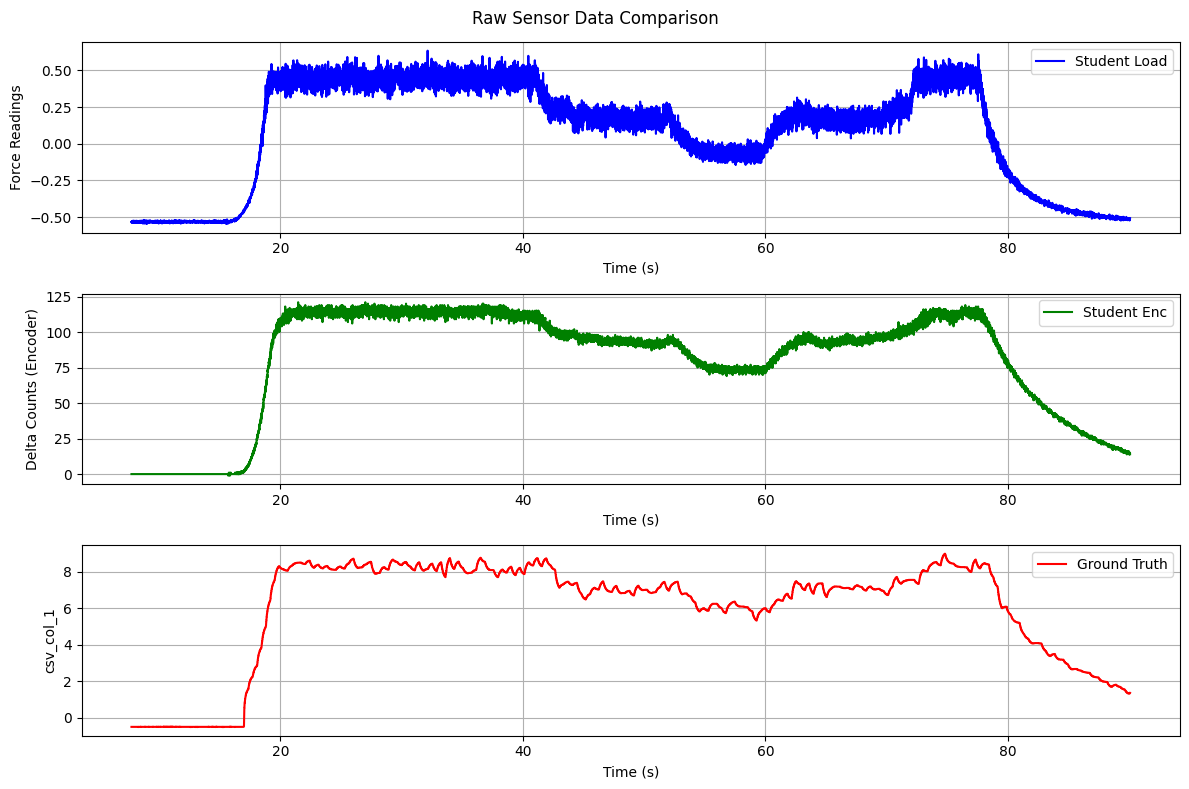

In [7]:
# Create figure with 2 subplots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
fig.suptitle('Raw Sensor Data Comparison')

# First subplot:  Load Cell (N)
ax1.plot(student_df['t_rel_s'], student_df['csv_col_0'], label='Student Load', color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Force Readings')
ax1.legend()
ax1.grid(True)

# Second subplot: Encoder Counts from student data
ax2.plot(student_df['t_rel_s'], student_df['csv_col_1_diff'], label='Student Enc', color='green')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Delta Counts (Encoder)')
ax2.legend()
ax2.grid(True)

#Third Subplot: Ground Truth
ax3.plot(ground_truth_df['t_rel_s'], ground_truth_df['csv_col_0'], label='Ground Truth', color='red')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('csv_col_1')
ax3.legend()
ax3.grid(True)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Computing PSD
This will be important to identify the frequencies the noise and signal operate in and how to effectively seperate them

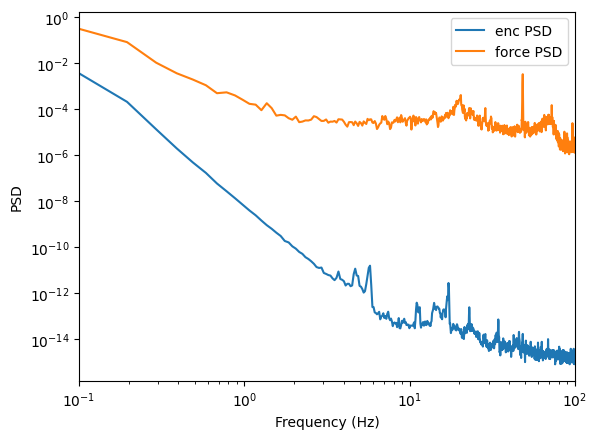

In [8]:
from scipy.signal import welch


load_data = student_df['csv_col_0'].values
enc_data = student_df['csv_col_1'].values

# normalise
enc_data_norm = enc_data / np.max(enc_data)
load_data_norm = load_data / np.max(load_data)


fs = 200.0
nperseg = 2048

f, P_enc = welch(enc_data_norm, fs=fs, nperseg=nperseg)
_, P_force = welch(load_data_norm, fs=fs, nperseg=nperseg)

plt.loglog(f, P_enc, label='enc PSD')
plt.loglog(f, P_force, label='force PSD')
plt.xlim(0.1, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.show()

### Velocity Estimate from Load Cell

In [9]:
# Convert to velocity to better compare psd

# get average zero bias for first 100 samples
load_bias = np.mean(load_data[:100])
load_bias_avg = -0.5315445

# zero the data again
load_data = load_data - load_bias_avg

# convert to velocity
A = 0.12 * 0.15
Cd = 1.28
rho = 1.225
c = 0.5 * rho * A * Cd
v_est_load = np.maximum(0, np.sqrt(np.where(load_data >= 0, load_data / c, 0)))

print(load_bias)

-0.5322729999999999


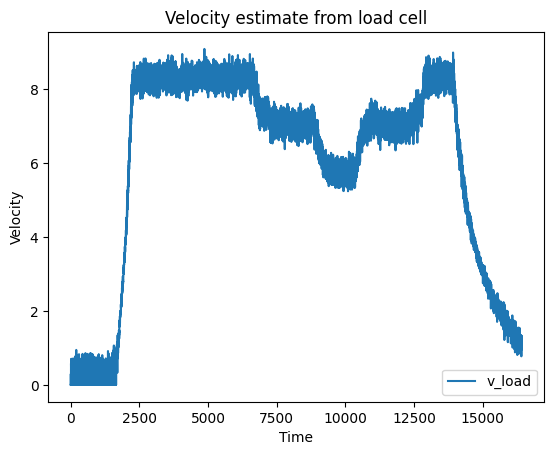

In [10]:
plt.figure()
plt.plot(v_est_load, label='v_load')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity estimate from load cell')
plt.legend()
plt.show()

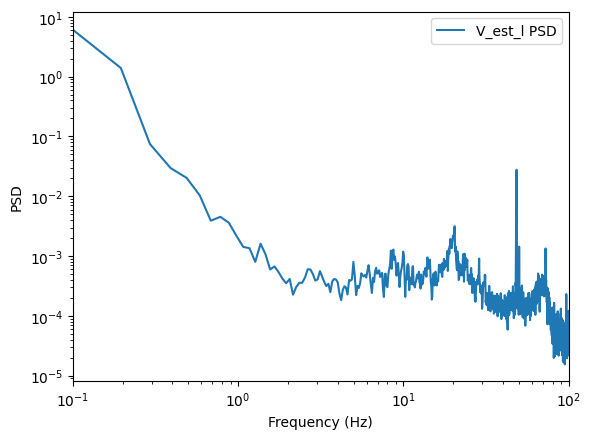

In [11]:
# Get PSD of this velocity
f, v_load_psd = welch(v_est_load, fs=fs, nperseg=nperseg)

plt.loglog(f, v_load_psd, label='V_est_l PSD')
# plt.loglog(f, P_force, label='force PSD')
plt.xlim(0.1, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.show()


### Velocity Estimate from Encoder

Using linear regression to find the coefficients

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
ground_truth_df = ground_truth_df.reset_index(drop=True)
student_df = student_df.reset_index(drop=True)

# Take minimum length to ensure matching
min_length = min(len(ground_truth_df), len(student_df))

X = student_df['csv_col_1_diff'].values[:min_length].reshape(-1, 1)  # Delta counts
y = ground_truth_df['csv_col_0'].values[:min_length]  # Actual wind speed

print(f"Training samples: {len(X)}")
print(f"X (encoder counts) range: [{X.min():.4f}, {X.max():.4f}]")
print(f"y (wind speed) range: [{y.min():.4f}, {y.max():.4f}]")

Training samples: 16422
X (encoder counts) range: [-1.0000, 121.0000]
y (wind speed) range: [-0.5000, 8.9900]


In [14]:
# Linear Reg
model = LinearRegression()
model.fit(X, y)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_

print("Linear Regression Model:")
print(f"Wind Speed = {slope:.6f} * (Encoder Counts) + {intercept:.6f}")
print(f"\nSlope (m): {slope:.6f}")
print(f"Intercept (b): {intercept:.6f}")

Linear Regression Model:
Wind Speed = 0.072351 * (Encoder Counts) + 0.267609

Slope (m): 0.072351
Intercept (b): 0.267609


In [15]:
y_pred = model.predict(X)

# Calculate metrics
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print("Model Performance:")
print(f"R² Score: {r2:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")

Model Performance:
R² Score: 0.958419
RMSE: 0.585159
MAE: 0.464892


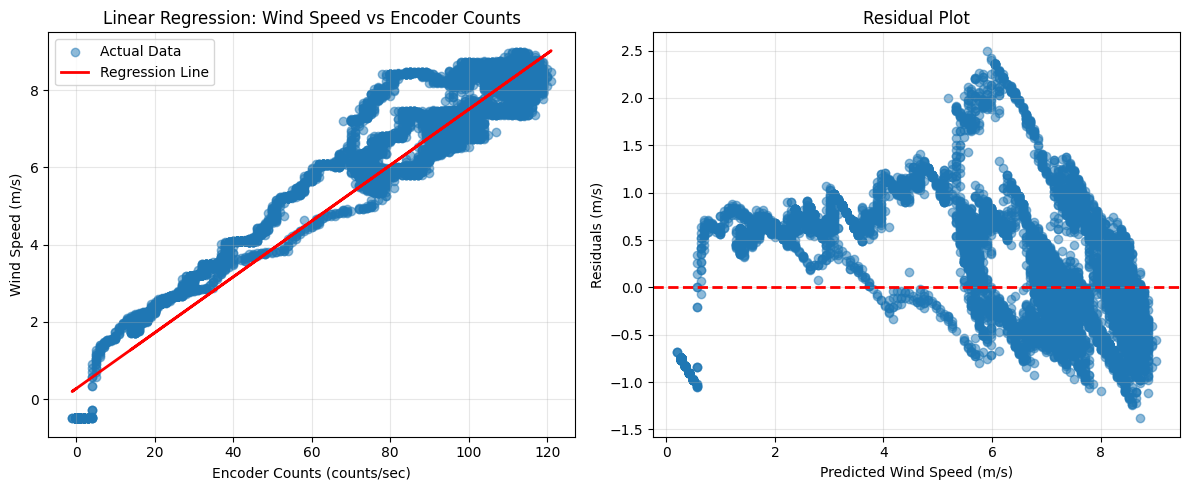

In [16]:
# Cell 7: Visualize the regression
plt.figure(figsize=(12, 5))

# Plot 1: Scatter plot with regression line
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Encoder Counts (counts/sec)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Linear Regression: Wind Speed vs Encoder Counts')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals plot
plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Wind Speed (m/s)')
plt.ylabel('Residuals (m/s)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Apply those coefficients to the real data and plot

v_est_enc = slope * student_df['csv_col_1_diff'].values + intercept
# sean's values
# v_est_enc_s = (0.00037409 / 0.005) * student_df['csv_col_1_diff'].values + 0.89063702
v_est_enc_d = 0.072351 * student_df['csv_col_1_diff'].values + 0.267609

print("First 5 elements:")
print("Original enc_data:", student_df['csv_col_1_diff'].values[:5])
print("Transformed v_est_enc:", v_est_enc[:5])

First 5 elements:
Original enc_data: [0. 0. 0. 0. 0.]
Transformed v_est_enc: [0.26760876 0.26760876 0.26760876 0.26760876 0.26760876]


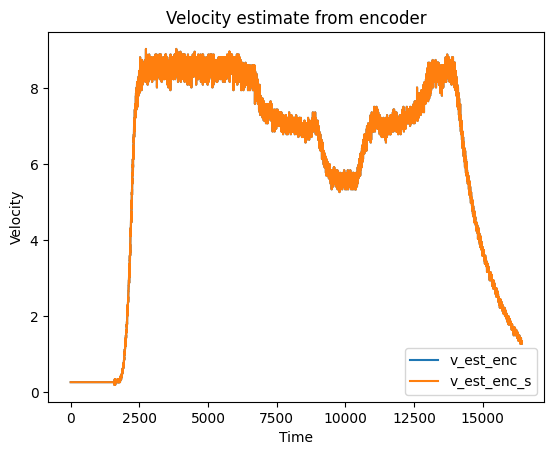

In [18]:
# Plot
plt.figure()
plt.plot(v_est_enc, label='v_est_enc')
plt.plot(v_est_enc_d, label='v_est_enc_s')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity estimate from encoder')
plt.legend()
plt.show()

#### Attempt PSD again with values in the same unit

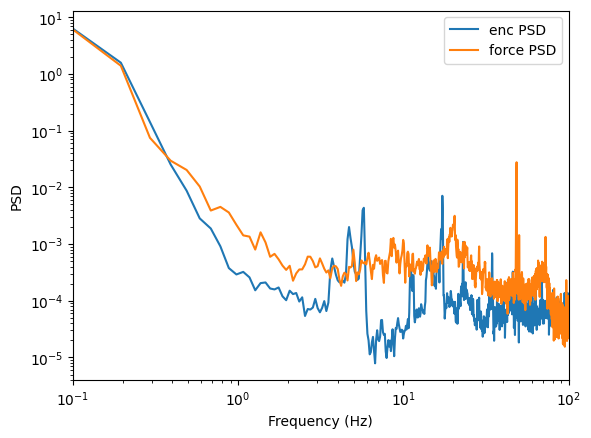

In [19]:
f, P_v_enc = welch(v_est_enc, fs=fs, nperseg=nperseg)
_, P_v_force = welch(v_est_load, fs=fs, nperseg=nperseg)

plt.figure()
plt.loglog(f, P_v_enc, label='enc PSD')
plt.loglog(f, P_v_force, label='force PSD')
plt.xlim(0.1, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.show()

## FUSION

Firstly calculating the MSE loss between the two estimates. Then using a complementary filter to get the dynamics (Using a single-pole LP for the load cell and the HP for the encoder)

In [20]:
# MSE LOSS - probs not representative
# Take minimum length to ensure matching arrays
min_length = min(len(ground_truth_df), len(student_df))
ground_truth = ground_truth_df['csv_col_0'].values[:min_length]

# Compute MSE for encoder estimate
mse_enc = mean_squared_error(ground_truth, v_est_enc[:min_length])
print(f"MSE between Ground Truth and Encoder Estimate: {mse_enc:.6f}")

# Compute MSE for load cell estimate
mse_load = mean_squared_error(ground_truth, v_est_load[:min_length])
print(f"MSE between Ground Truth and Load Cell Estimate: {mse_load:.6f}")

# Optional: Compute RMSE for both
rmse_enc = np.sqrt(mse_enc)
rmse_load = np.sqrt(mse_load)
print(f"\nRMSE for Encoder Estimate: {rmse_enc:.6f}")
print(f"RMSE for Load Cell Estimate: {rmse_load:.6f}")

MSE between Ground Truth and Encoder Estimate: 0.342411
MSE between Ground Truth and Load Cell Estimate: 0.824469

RMSE for Encoder Estimate: 0.585159
RMSE for Load Cell Estimate: 0.908003


In [21]:
# prefiltering
fc = 1
fs = 200
alpha_prefilt = (2*np.pi*fc/fs) / (1 + 2*np.pi*fc/fs)

In [25]:
# Complementary filters 
fc_cross = 1
dt = 1 / 200
tau = 1/(2*np.pi*fc_cross)
alpha = dt/(tau + dt)

# Real time simulation

n = len(v_est_load)
    
# Initialize arrays
v_est = np.zeros(n)
LP_force = np.zeros(n)
LP_enc = np.zeros(n)

# Initialize first values
LP_force[0] = v_est_load[0]
LP_enc[0] = v_est_enc_d[0]
v_est[0] = v_est_enc[0] 

for i in range(1, n):
    # Update low-pass filters (this is the complementary filter logic)
    LP_force[i] = LP_force[i-1] + alpha * (v_est_load[i] - LP_force[i-1])
    LP_enc[i] = LP_enc[i-1] + alpha * (v_est_enc_d[i] - LP_enc[i-1])
    
    # Estimate velocity: high-pass encoder + low-pass force
    # (v_enc - LP_enc) = high frequency component from encoder
    # LP_force = low frequency component from force sensor
    # v_est[i] = (v_est_enc[i] - LP_enc[i]) + LP_force[i]
    v_est[i] = (LP_enc[i] + LP_force[i]) / 2

In [26]:
mse_final = mean_squared_error(ground_truth, v_est[:min_length])
print("MSE after filtering and fusion: ", mse_final)

MSE after filtering and fusion:  0.40625610815521107


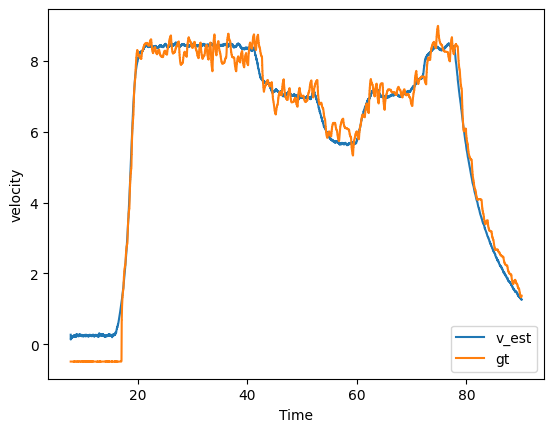

In [27]:
# Plot v_est over v
plt.figure()
plt.plot(student_df['t_rel_s'], v_est, label="v_est")
plt.plot(ground_truth_df['t_rel_s'], ground_truth_df['csv_col_0'].values, label="gt")
plt.xlabel("Time")
plt.ylabel("velocity")
plt.legend()
plt.show()